<a href="https://colab.research.google.com/github/lancetulagan/expense-tracker-mern/blob/main/DataPre_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal for the project is to look at the amounts of various contaminants (PM10, PM2_5, CO, N02, SO2) in all the cities in Metro Manila over time, from January 2025 to April 2025.

We will use this Python Wrapper for OpenMeteo found on github.(https://github.com/m0rp43us/openmeteopy/blob/main/readme/AIR_QUALITY.md). We install its library from git below:

In [ ]:
pip install git+https://github.com/m0rp43us/openmeteopy

  Cloning https://github.com/m0rp43us/openmeteopy to /tmp/pip-req-build-5361x8j6
  Running command git clone --filter=blob:none --quiet https://github.com/m0rp43us/openmeteopy /tmp/pip-req-build-5361x8j6
  Resolved https://github.com/m0rp43us/openmeteopy to commit be76f2deabd7ff5ec3f87ebc983091a367e24117
  Preparing metadata (setup.py) ... done


In [ ]:
#Importing basic necessary python libraries and modules
import pandas as pd
import numpy as np
import requests, json #for getting requests from apis
import matplotlib.pyplot as plt

We install geopy to be able to geocode and retrieve the lattitude and longitude coordinates from a given list of names of all the cities in Metro Manila

In [ ]:
pip install geopy

In [ ]:
import time
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter #So that we dont overload geopy with too many requests

metro_manila_cities = [
    "Caloocan", "Las Piñas", "Makati", "Malabon", "Mandaluyong",
    "Manila", "Marikina", "Muntinlupa", "Navotas", "Parañaque",
    "Pasay", "Pasig", "Quezon City", "San Juan", "Taguig",
    "Valenzuela", "Pateros"
]

geolocator = Nominatim(user_agent="hello")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

We set up a list of names for all the cities in metro manila to feed to the geopy

We initialize and empty dictionary named city_coords to store the city name as a key with the lattitude and longitude coordinates and value pairs

In [ ]:
city_coords = {}

for city in metro_manila_cities:
  location = geocode(city)
  city_coords[city] = (location.latitude, location.longitude)
  print(f"Coordinates for {city}: {city_coords[city]}")

Coordinates for Caloocan: (14.651348, 120.9724002)
Coordinates for Las Piñas: (14.4809012, 120.9817861)
Coordinates for Makati: (14.5567949, 121.0211226)
Coordinates for Malabon: (14.6578504, 120.9511261)
Coordinates for Mandaluyong: (14.5774392, 121.0338973)


Coordinates for Manila: (14.5904492, 120.9803621)
Coordinates for Marikina: (14.6331084, 121.0993541)
Coordinates for Muntinlupa: (14.3892634, 121.0449101)
Coordinates for Navotas: (14.6571862, 120.9479692)
Coordinates for Parañaque: (14.5008116, 120.9915327)
Coordinates for Pasay: (14.5436995, 120.9946503)
Coordinates for Pasig: (14.5605166, 121.0764343)
Coordinates for Quezon City: (14.6510546, 121.0486254)
Coordinates for San Juan: (18.384239049999998, -66.05343997364733)
Coordinates for Taguig: (14.5270538, 121.0744942)
Coordinates for Valenzuela: (14.6916903, 120.9694534)
Coordinates for Pateros: (14.5447555, 121.067134)


In [ ]:
city_coords #double checking the dictionary of city name and coordinates

{'Caloocan': (14.651348, 120.9724002),
 'Las Piñas': (14.4809012, 120.9817861),
 'Makati': (14.5567949, 121.0211226),
 'Malabon': (14.6578504, 120.9511261),
 'Mandaluyong': (14.5774392, 121.0338973),
 'Manila': (14.5904492, 120.9803621),
 'Marikina': (14.6331084, 121.0993541),
 'Muntinlupa': (14.3892634, 121.0449101),
 'Navotas': (14.6571862, 120.9479692),
 'Parañaque': (14.5008116, 120.9915327),
 'Pasay': (14.5436995, 120.9946503),
 'Pasig': (14.5605166, 121.0764343),
 'Quezon City': (14.6510546, 121.0486254),
 'San Juan': (18.384239049999998, -66.05343997364733),
 'Taguig': (14.5270538, 121.0744942),
 'Valenzuela': (14.6916903, 120.9694534),
 'Pateros': (14.5447555, 121.067134)}

In [ ]:
#importing the necessaryn modules and libraries to be able to use OpenMeteo
from openmeteopy import OpenMeteo
from openmeteopy.hourly import HourlyAirQuality
from openmeteopy.options import AirQualityOptions
from datetime import datetime

The steps below are to choose which contents in the air we wish to observe. These components of the air are commonly linked to adverse health effects and so their presences are key indicators of air quality

In [ ]:
hourly = HourlyAirQuality()
hourly.pm10()
hourly.pm2_5()
hourly.carbon_monoxide()
hourly.nitrogen_dioxide()
hourly.sulphur_dioxide()

Next, we iterate through our dictionary of city coordinates, fetching the data for each city. They are then combined into one dataframe

In [ ]:
data = []

for city, coords in city_coords.items():
    latitude, longitude = coords
    options = AirQualityOptions(latitude, longitude, past_days=92) #unforunately due to api limitations, we can only look 92 days in the past
    mgr = OpenMeteo(options, hourly)
    meteo = mgr.get_pandas().reset_index()
    meteo["City"] = city
    data.append(meteo)

meteo_dataframe = pd.concat(data)
meteo_dataframe


time  pm10  pm2_5  carbon_monoxide  nitrogen_dioxide  \
0     2025-01-10T00:00  13.3   10.5            365.0               8.1   
1     2025-01-10T01:00  14.0   11.1            351.0               6.8   
2     2025-01-10T02:00  14.7   11.7            305.0               5.1   
3     2025-01-10T03:00  14.9   11.8            267.0               3.7   
4     2025-01-10T04:00  14.6   11.6            249.0               2.9   
...                ...   ...    ...              ...               ...   
2323  2025-04-16T19:00  16.0   14.7            275.0              15.9   
2324  2025-04-16T20:00  16.5   15.1            282.0              16.8   
2325  2025-04-16T21:00  17.2   15.7            279.0              16.7   
2326  2025-04-16T22:00  18.8   17.3            257.0              14.3   
2327  2025-04-16T23:00  18.1   16.1            226.0              10.8   

      sulphur_dioxide      City  
0                 8.7  Caloocan  
1                 8.4  Caloocan  
2                 8.0  Caloocan  
3                 7.5  Caloocan  
4                 6.7  Caloocan  
...               ...       ...  
2323              5.0   Pateros  
2324              5.1   Pateros  
2325              5.4   Pateros  
2326              6.3   Pateros  
2327              7.4   Pateros  

[39576 rows x 7 columns]

Unfortunately, OpenMeteoPy has its limitations. Most of its parameters used for setting date ranges for data retrieval do not work. The only parameter that was found to be working was past_days which is unfortunately capped at 92. So, the data utilized in this analysis spans 92 days past the latest date this colab notebook is run. This unfortunately will mean that the insights and resulting from the data may not be relevant or accurate depending on when this notebook is last edited or run.

Below we ensure that the time column is in the correct datetime format and that we cap it's latest recorded day to April 8, 2025.

In [ ]:
meteo_dataframe['time'] = pd.to_datetime(meteo_dataframe['time']) #ensuring that the entries in the time column are datetime objects
meteo_dataframe['Day'] = meteo_dataframe['time'].dt.day
meteo_dataframe['Date'] = meteo_dataframe['time'].dt.date
meteo_dataframe = meteo_dataframe[meteo_dataframe['Date'] <= pd.to_datetime('2025-04-08').date()]



We use the describe() function to get the important statistics on the dataset.

In [ ]:
meteo_dataframe.describe()

time          pm10         pm2_5  carbon_monoxide  \
count                36312  36312.000000  36312.000000     36312.000000   
mean   2025-02-23 11:30:00     11.568294      9.727658       315.574411   
min    2025-01-10 00:00:00      1.500000      1.100000        84.000000   
25%    2025-02-01 05:45:00      7.100000      5.500000       230.000000   
50%    2025-02-23 11:30:00     10.000000      8.100000       283.000000   
75%    2025-03-17 17:15:00     14.500000     12.000000       364.250000   
max    2025-04-08 23:00:00     65.000000     63.600000      2420.000000   
std                    NaN      6.548059      6.190702       148.624539   

       nitrogen_dioxide  sulphur_dioxide           Day  
count      36312.000000     36312.000000  36312.000000  
mean           7.942319         7.316259     15.606742  
min            0.100000         0.100000      1.000000  
25%            3.600000         3.200000      8.000000  
50%            6.100000         5.500000     16.000000  
75%           10.200000        10.000000     23.000000  
max           54.600000        39.100000     31.000000  
std            6.552514         5.659083      8.732879

We want to make sure that there are no duplicate entries in the dataset. We use the duplicated() function to see which entries in the dataset are duplicated.

In [ ]:
meteo_dataframe.duplicated().sum()

np.int64(0)

Next, we look at the histograms of the pollutants to see the shape of the distribution of each pollutant.

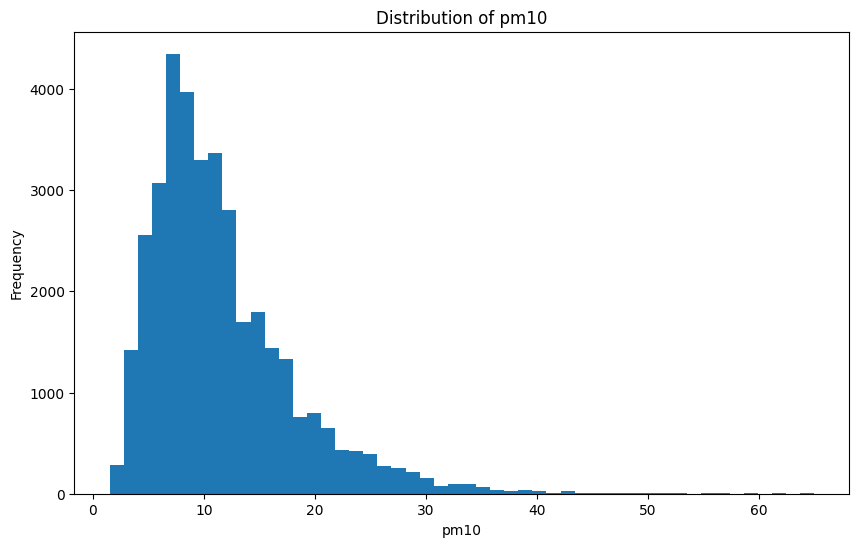

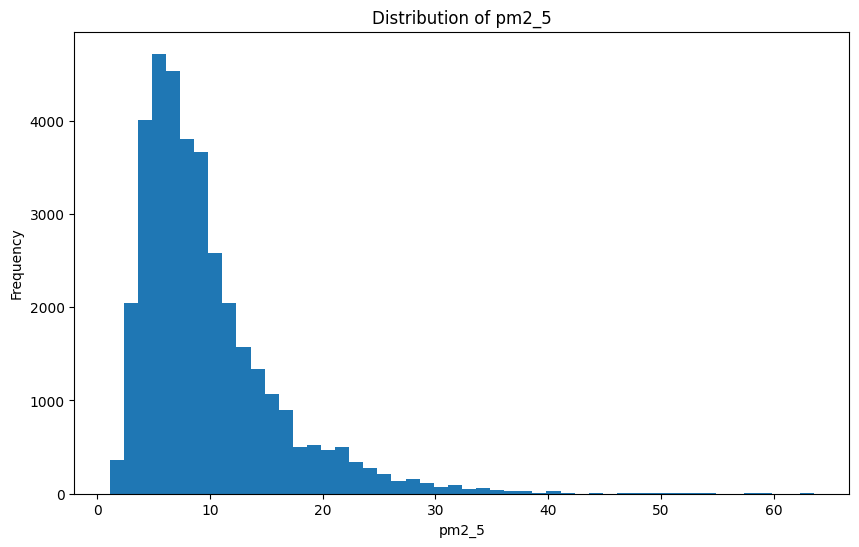

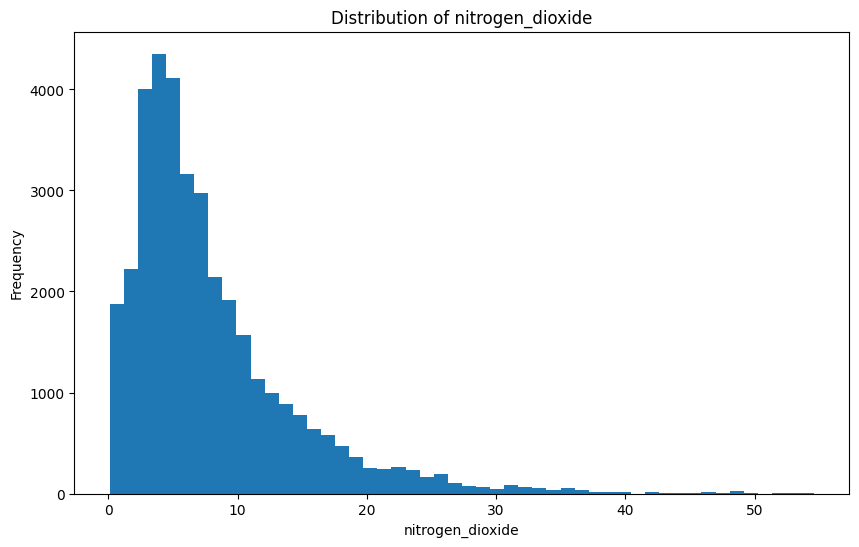

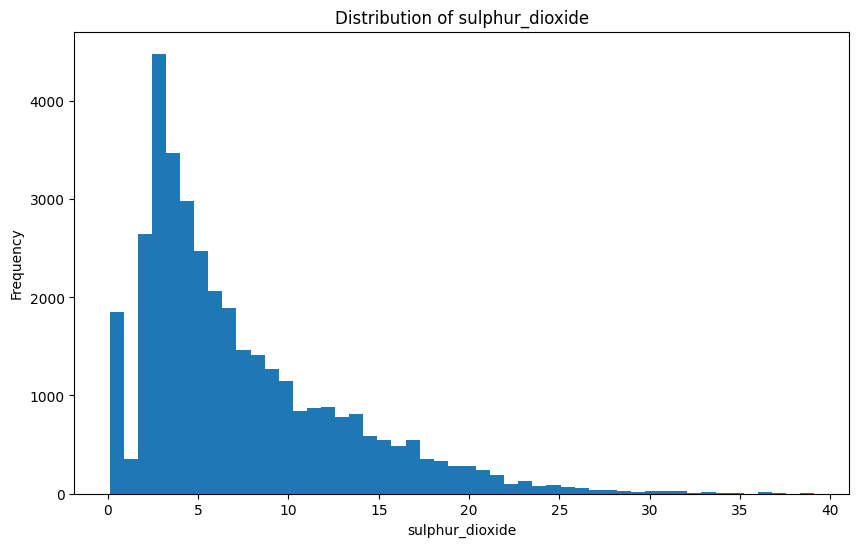

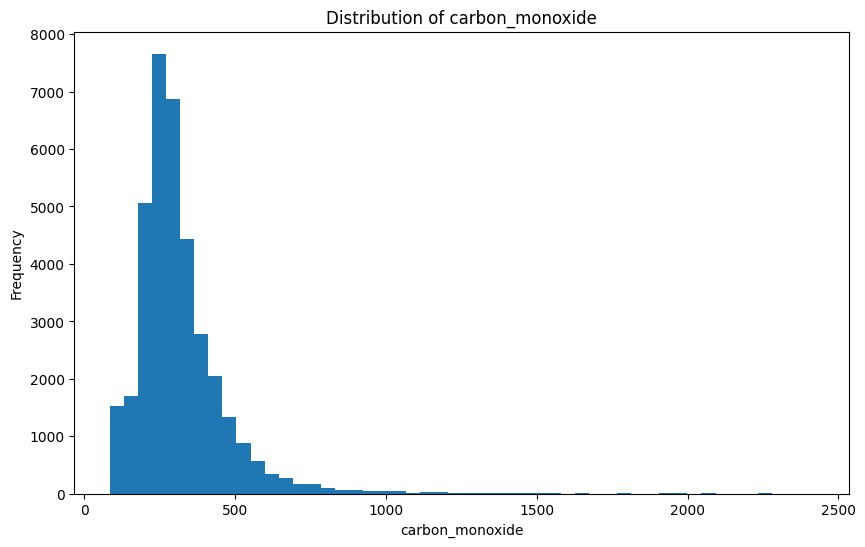

In [ ]:
pollutants = ['pm10', 'pm2_5', 'nitrogen_dioxide', 'sulphur_dioxide', 'carbon_monoxide']
for pollutant in pollutants:
    plt.figure(figsize=(10, 6))
    plt.hist(meteo_dataframe[pollutant], bins=50)
    plt.title(f'Distribution of {pollutant}')
    plt.xlabel(pollutant)
    plt.ylabel('Frequency')
    plt.show()


We can see from above that the distributions of quantities of all air pollutants are right skewed.

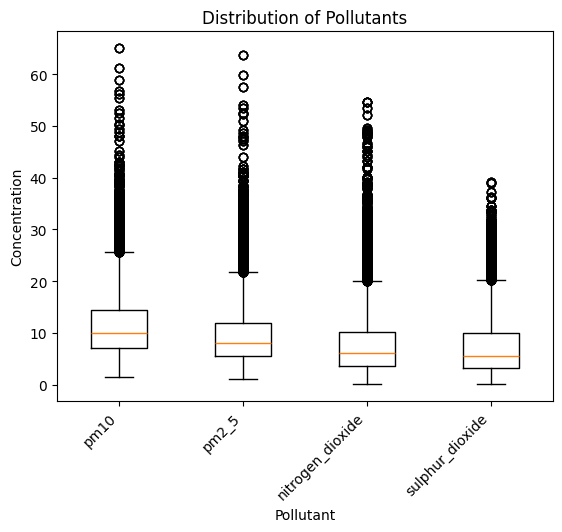

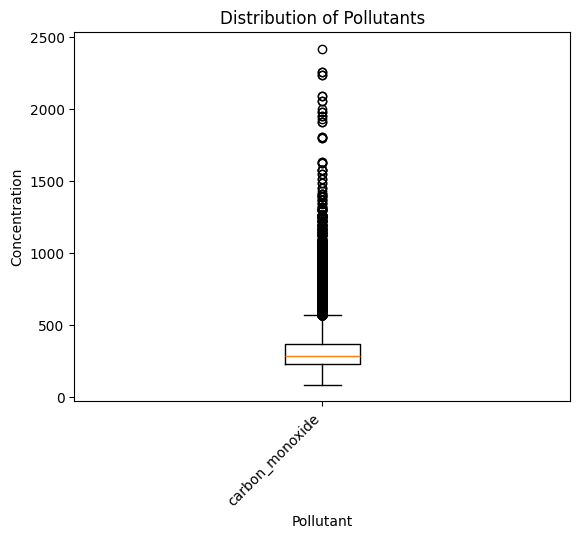

In [ ]:
pollutants = ['pm10', 'pm2_5', 'nitrogen_dioxide', 'sulphur_dioxide']

fig, ax = plt.subplots()
ax.boxplot([meteo_dataframe[pollutant] for pollutant in pollutants])
ax.set_xticklabels(pollutants)  # Set x-axis labels to pollutant names
ax.set_xlabel('Pollutant')
ax.set_ylabel('Concentration')
ax.set_title('Distribution of Pollutants')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

pollutants = ['carbon_monoxide']

fig, ax = plt.subplots()
ax.boxplot([meteo_dataframe[pollutant] for pollutant in pollutants])
ax.set_xticklabels(pollutants)  # Set x-axis labels to pollutant names
ax.set_xlabel('Pollutant')
ax.set_ylabel('Concentration')
ax.set_title('Distribution of Pollutants')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

We see that there are many outlier values for each of the pollutants. Our analysis will use the Air Quality Index to determine the air quality in the cities in Metro Manila. The process of converting the raw values of air pollutant quantities into AQI values involves the use of breakpoints and thresholds. Thus, we do not have to worry about the outliers as this is taken into account in AQI calculation.

In [ ]:
AQI_BREAKPOINTS_UGM3 = {
    "pm10": [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200), (355, 424, 201, 300), (425, 604, 301, 500)],
    "pm2_5": [(0.0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 500.4, 301, 500)],

    # CO in µg/m³ (converted from ppm, using molar mass 28.01)
    "carbon_monoxide": [(0.0, 123.2, 0, 50), (123.3, 263.6, 51, 100), (263.7, 347.1, 101, 150),
                        (347.2, 431.0, 151, 200), (431.1, 850.6, 201, 300), (850.7, 1402.6, 301, 500)],

    # NO2 in µg/m³ (converted from ppb, using molar mass 46.01)
    "nitrogen_dioxide": [(0, 97.0, 0, 50), (98, 183.0, 51, 100), (184, 659.0, 101, 150),
                         (660, 1192.0, 151, 200), (1193, 2293.0, 201, 300), (2294, 3752.0, 301, 500)],

    # SO2 in µg/m³ (converted from ppb, using molar mass 64.07)
    "sulphur_dioxide": [(0, 89.0, 0, 50), (90, 185.0, 51, 100), (186, 457.0, 101, 150),
                        (458, 751.0, 151, 200), (752, 1488.0, 201, 300), (1489, 2466.0, 301, 500)],
}
# AQI Calculation Function
def calculate_aqi(concentration, breakpoints):
    if concentration < breakpoints[0][0]:
        return breakpoints[0][2]  # lowest AQI
    if concentration > breakpoints[-1][1]:
        return breakpoints[-1][3]  # highest AQI

    for C_low, C_high, I_low, I_high in breakpoints:
        if C_low <= concentration <= C_high:
            return round(((I_high - I_low) / (C_high - C_low)) * (concentration - C_low) + I_low)
    return None

for pollutant in AQI_BREAKPOINTS_UGM3.keys():
    meteo_dataframe[f"{pollutant}_aqi"] = meteo_dataframe[pollutant].apply(lambda x: calculate_aqi(x, AQI_BREAKPOINTS_UGM3[pollutant]))

meteo_dataframe["final_aqi"] = meteo_dataframe[[f"{pollutant}_aqi" for pollutant in AQI_BREAKPOINTS_UGM3.keys()]].max(axis=1)
meteo_dataframe['final_aqi_contributor'] = meteo_dataframe[[f"{pollutant}_aqi" for pollutant in AQI_BREAKPOINTS_UGM3.keys()]].idxmax(axis=1)

<ipython-input-166-aecc22ac8a92>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-166-aecc22ac8a92>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-166-aecc22ac8a92>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-166-

In [ ]:
meteo_dataframe = meteo_dataframe[meteo_dataframe['Date'] <= pd.to_datetime('2025-04-08').date()]
meteo_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36312 entries, 0 to 2135
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time                   36312 non-null  datetime64[ns]
 1   pm10                   36312 non-null  float64       
 2   pm2_5                  36312 non-null  float64       
 3   carbon_monoxide        36312 non-null  float64       
 4   nitrogen_dioxide       36312 non-null  float64       
 5   sulphur_dioxide        36312 non-null  float64       
 6   City                   36312 non-null  object        
 7   Day                    36312 non-null  int32         
 8   Date                   36312 non-null  object        
 9   pm10_aqi               36312 non-null  int64         
 10  pm2_5_aqi              36312 non-null  int64         
 11  carbon_monoxide_aqi    36312 non-null  int64         
 12  nitrogen_dioxide_aqi   36312 non-null  int64         
 13  sulphur

Below we wish to see which pollutant is the greatest factor in determining the final aqi of a given area.

In [ ]:
meteo_dataframe[['final_aqi_contributor', 'City']].value_counts()

final_aqi_contributor  City       
carbon_monoxide_aqi    Makati         2136
                       Mandaluyong    2136
                       Marikina       2136
                       Pasig          2136
                       Quezon City    2136
                       Taguig         2130
                       Pateros        2130
                       Caloocan       2129
                       Malabon        2129
                       Valenzuela     2129
                       Manila         2128
                       San Juan       2127
                       Muntinlupa     2126
                       Navotas        2102
                       Parañaque      2097
                       Las Piñas      2097
                       Pasay          2097
pm2_5_aqi              Las Piñas        39
                       Pasay            39
                       Parañaque        39
                       Navotas          34
                       Muntinlupa       10
                       San Juan          9
                       Manila            8
                       Caloocan          7
                       Malabon           7
                       Valenzuela        7
                       Pateros           6
                       Taguig            6
Name: count, dtype: int64

We see that the pollutant that contributes the most to the final aqi in all cities in metro manila is Carbon Dioxide, which severly dominates the second largest contributor to aqi, pm2_5

In [ ]:
meteo_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36312 entries, 0 to 2135
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time                   36312 non-null  datetime64[ns]
 1   pm10                   36312 non-null  float64       
 2   pm2_5                  36312 non-null  float64       
 3   carbon_monoxide        36312 non-null  float64       
 4   nitrogen_dioxide       36312 non-null  float64       
 5   sulphur_dioxide        36312 non-null  float64       
 6   City                   36312 non-null  object        
 7   Day                    36312 non-null  int32         
 8   Date                   36312 non-null  object        
 9   pm10_aqi               36312 non-null  int64         
 10  pm2_5_aqi              36312 non-null  int64         
 11  carbon_monoxide_aqi    36312 non-null  int64         
 12  nitrogen_dioxide_aqi   36312 non-null  int64         
 13  sulphur

We see that there are no null values in our data

Next, we import geopandas and osmnx. Geopandas is a library that will allow us to work with geo dataframes, and osmnx is OpenStreetMap's free API which will allow us to query the boundary data for all of the cities in Metro Manila

In [ ]:
!pip install osmnx
import osmnx as ox
import geopandas as gpd

metro_manila_cities = [
    "Manila", "Quezon City", "Caloocan", "Pasig", "Makati", "Taguig", "Parañaque",
    "Mandaluyong", "Las Piñas", "Muntinlupa", "Marikina", "Malabon", "Navotas",
    "San Juan", "Pasay", "Valenzuela", "Pateros"
]

gdfs = []

for city in metro_manila_cities:
    city_name = f"{city}, Metro Manila, Philippines"
    print(f"Downloading: {city_name}")
    gdf = ox.geocode_to_gdf(city_name, which_result =1)
    gdf["city"] = city
    gdfs.append(gdf)
    time.sleep(1)

# Combine and save
all_cities = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True), crs="EPSG:4326")
all_cities.to_file("metro_manila_city_boundaries.geojson", driver="GeoJSON")
print("Saved to metro_manila_city_boundaries.geojson")

Downloading: Manila, Metro Manila, Philippines
Downloading: Quezon City, Metro Manila, Philippines
Downloading: Caloocan, Metro Manila, Philippines
Downloading: Pasig, Metro Manila, Philippines
Downloading: Makati, Metro Manila, Philippines
Downloading: Taguig, Metro Manila, Philippines
Downloading: Parañaque, Metro Manila, Philippines
Downloading: Mandaluyong, Metro Manila, Philippines
Downloading: Las Piñas, Metro Manila, Philippines
Downloading: Muntinlupa, Metro Manila, Philippines
Downloading: Marikina, Metro Manila, Philippines
Downloading: Malabon, Metro Manila, Philippines
Downloading: Navotas, Metro Manila, Philippines
Downloading: San Juan, Metro Manila, Philippines
Downloading: Pasay, Metro Manila, Philippines
Downloading: Valenzuela, Metro Manila, Philippines
Downloading: Pateros, Metro Manila, Philippines
Saved to metro_manila_city_boundaries.geojson


We take the average of the final aqis per city and sort by descending order as we want to conduct our analysis on the top 3 cities with the highest aqis

In [ ]:
avg_aqi_per_city = meteo_dataframe.groupby('City')['final_aqi'].mean().reset_index().sort_values(by='final_aqi', ascending=False)
avg_aqi_per_city

City   final_aqi
6      Marikina  155.958333
11        Pasig  155.958333
5        Manila  147.517790
4   Mandaluyong  147.447566
2        Makati  147.447566
0      Caloocan  143.101592
3       Malabon  143.101592
16   Valenzuela  143.101592
13  Quezon City  143.079588
10        Pasay  127.609551
9     Parañaque  127.609551
1     Las Piñas  127.609551
8       Navotas  126.468165
15       Taguig  109.047285
12      Pateros  109.047285
7    Muntinlupa   96.921816
14     San Juan   50.302903

Then, we combine the results with the queried city boundary data from osmnx using left join

In [ ]:
merged_data = all_cities.merge(avg_aqi_per_city, left_on='city', right_on='City', how='left')

After which we make a heatmap using plotly showcasing the average final aqis in each city. We also plot the specific points that were returned from geopy earlier which were used to query the air contents from geopy

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.choropleth_mapbox(
    merged_data,
    geojson=merged_data.geometry.__geo_interface__,
    locations=merged_data.index,
    color="final_aqi",
    hover_name="city",
    mapbox_style="carto-positron",
    center={"lat": 14.5995, "lon": 120.9842},
    zoom=9,
    opacity=0.5,
    color_continuous_scale="Reds",
    title="Average Air Quality Index (AQI) in Metro Manila"
)

fig.update_layout(margin={"r": 0, "t": 30, "l": 0, "b": 0})

fig.add_trace(                   #to make sure that each city coordinate is in the
    go.Scattermapbox(
        lat=[coords[0] for coords in city_coords.values()],
        lon=[coords[1] for coords in city_coords.values()],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=10,
            color='red'
        ),
        text=list(city_coords.keys()),
    )
)
fig.show()

In [ ]:
avg_aqi_per_city = meteo_dataframe.groupby('City')['final_aqi'].mean().sort_values(ascending=False)
avg_aqi_per_city

City
Marikina       155.958333
Pasig          155.958333
Manila         147.517790
Mandaluyong    147.447566
Makati         147.447566
Caloocan       143.101592
Malabon        143.101592
Valenzuela     143.101592
Quezon City    143.079588
Pasay          127.609551
Parañaque      127.609551
Las Piñas      127.609551
Navotas        126.468165
Taguig         109.047285
Pateros        109.047285
Muntinlupa      96.921816
San Juan        50.302903
Name: final_aqi, dtype: float64

Thus we see we look at the top three cities that have the worst average air quality, Pasig, Marikina, and Manila. It is important to note that some of the averaged final_aqi's are return the exact same value. This could be due to various reasons:


1.   The points of some cities maybe to close together resulting in the same final aqi readings
2.   Because aqi is calculated by utilizing threshold breakpoints, actual content of a pollutant may be different however their aqi may return the same value
3. We don't know how Open Meteo collects their readings for a given area. For example, the weather collection device may be used for a large area encompassing multiple cities, resulting in multiple cities having the same values.

Despite this, we will take the data as is and proceed with the analysis.



Below we plot the actual final aqi values in the cities with the highest average final aqi, Marikina, Pasig, and Manila, and the city with the lowest average final aqi, San Juan, starting from January 6, 2025 to April 4, 2025.

In [ ]:
import time
import plotly.express as px
from plotly.offline import iplot

for city in ['Pasig', 'Marikina', 'Manila', 'San Juan']:
    fig = px.line(meteo_dataframe[meteo_dataframe["City"] == city], x="time", y="final_aqi", color="City", title  = "Final AQI Score over time in " + city, range_x = ["2025-01-06 00:00:00", "2025-04-08 :00:00"])
    iplot(fig)
    time.sleep(2)

From the graphs of the final aqi's in the cities above, we see notable peaks on the dates of January 14 and February 14 in Marikina, Pasig, and Manila. In San Juan a notable peak in worsened air quality happend on March 1.

In [ ]:
most_polluted_df = meteo_dataframe[meteo_dataframe['City'].isin(['Marikina','Pasig','Manila'])]

most_polluted_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6408 entries, 0 to 2135
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time                   6408 non-null   datetime64[ns]
 1   pm10                   6408 non-null   float64       
 2   pm2_5                  6408 non-null   float64       
 3   carbon_monoxide        6408 non-null   float64       
 4   nitrogen_dioxide       6408 non-null   float64       
 5   sulphur_dioxide        6408 non-null   float64       
 6   City                   6408 non-null   object        
 7   Day                    6408 non-null   int32         
 8   Date                   6408 non-null   object        
 9   pm10_aqi               6408 non-null   int64         
 10  pm2_5_aqi              6408 non-null   int64         
 11  carbon_monoxide_aqi    6408 non-null   int64         
 12  nitrogen_dioxide_aqi   6408 non-null   int64         
 13  sulphur_

In [ ]:
Pasig_DF = most_polluted_df[most_polluted_df['City'] == 'Pasig']
Marikina_DF = most_polluted_df[most_polluted_df['City'] == 'Marikina']
Manila_DF = most_polluted_df[most_polluted_df['City'] == 'Manila']
San_Juan_DF = meteo_dataframe[meteo_dataframe['City'] == 'San Juan']

Now let us conduct relevant time series analysis to each of the data for the top 3 most cities with the worst air quality Pasig, Marikina, Manila, and the city with the best airquality, San Juan.




#Pasig

First we start by inspecting the Data from Pasig at the hourly level. We look athe Trend, Seasonal, and Residual values for the final aqi of Pasig using the seasonal_decompose function from statsmodels.


For the hourly datasets, we will be plotting two seasonal decompose graphs. The first would be using matplotlib to observe the trends and residuals, and then plotly to better examin the hourly seasonality as it has superior customizability and interactability. Additionally, for the plotly graphs, and to observe the actual hourly seasonality, we will only plot the first 48 hours.



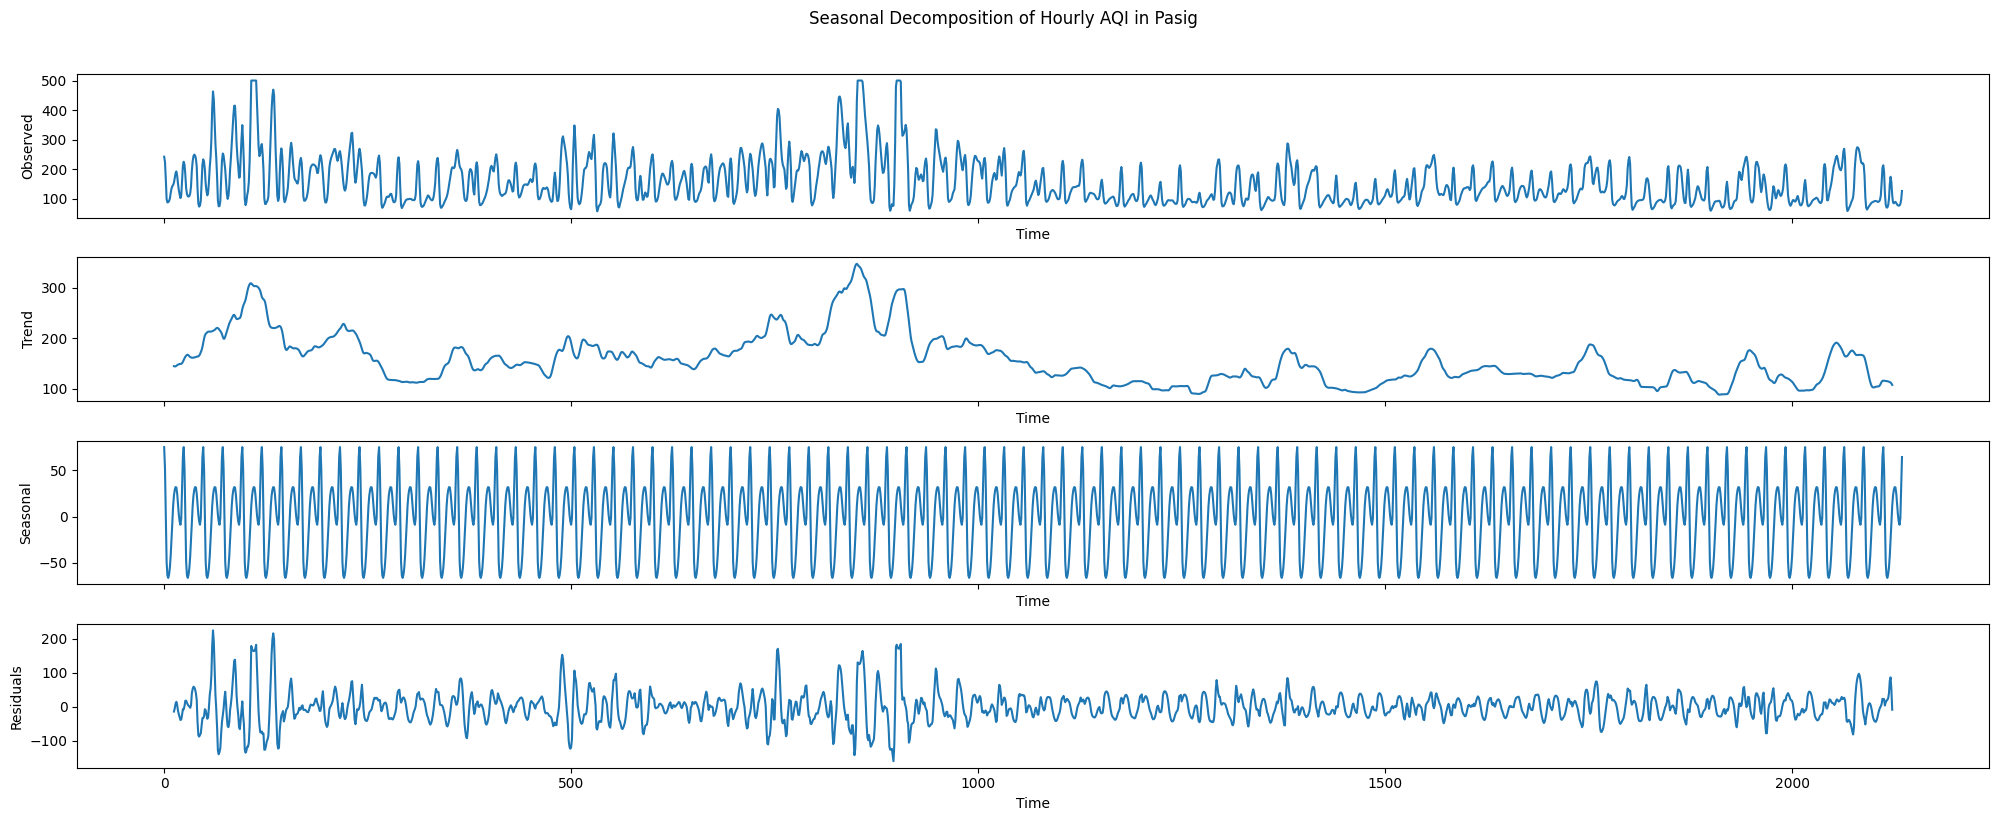

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Pasig_DF['Log of aqi'] = np.log(Pasig_DF['final_aqi'])
#Pasig_DF.set_index('time', inplace=True)
result_Pasig = seasonal_decompose(Pasig_DF['final_aqi'], model='additive', period=24) #REMOVE [0:49] TO SEE THE FULL RESULT I JSUT DID THSI TO SEE THE SEASONALITY PROPERLY

print()
fig, axs = plt.subplots(4, 1, figsize=(20, 8), sharex=True)

axs[0].plot(result_Pasig.observed)
axs[0].set_ylabel('Observed')
axs[0].set_xlabel('Time')

axs[1].plot(result_Pasig.trend)
axs[1].set_ylabel('Trend')
axs[1].set_xlabel('Time')

axs[2].plot(result_Pasig.seasonal)
axs[2].set_ylabel('Seasonal')
axs[2].set_xlabel('Time')

axs[3].plot(result_Pasig.resid)
axs[3].set_ylabel('Residuals')
axs[3].set_xlabel('Time')

plt.suptitle('Seasonal Decomposition of Hourly AQI in Pasig', y=1.02)
plt.tight_layout()
plt.show()

We see that there does not seme to be a clear trend in the hourly final aqi in Pasig City. In terms of residuals plot, we see that the data during the first half (Januray and February) have a higher variance as compared to the latter half of the datapoints.

In [ ]:
import plotly.graph_objects as go

observed = go.Scatter(x=Pasig_DF['time'], y=result_Pasig.observed, mode='lines', name='Observed')
trend = go.Scatter(x=Pasig_DF['time'], y=result_Pasig.trend, mode='lines', name='Trend')
seasonal = go.Scatter(x=Pasig_DF['time'], y=result_Pasig.seasonal, mode='lines', name='Seasonal')
residual = go.Scatter(x=Pasig_DF['time'], y=result_Pasig.resid, mode='lines', name='Residual')


fig = go.Figure(data=[observed])
fig.update_layout(title='Observed',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[trend])
fig.update_layout(title='Trend',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[seasonal])
fig.update_layout(title='Seasonal',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[residual])
fig.update_layout(title='Residual',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()

We see that from the seasonality plot of Seasonal_Decompose that bad air quality conditions peak at midnight and at around noon each day. Conversly, the times at which final aqi is lowest are at 6 am and 6pm.

Now looking at pasig at the daily level. To do this we must convert the granularity from the hourly level to the daily level by aggregating (mean).

In [ ]:
Pasig_DF_Daily = Pasig_DF.groupby(pd.Grouper(key = 'time', freq = 'D'))['final_aqi'].mean().reset_index()

In [ ]:
Pasig_DF_Daily

time   final_aqi
0  2025-01-10  145.541667
1  2025-01-11  161.875000
2  2025-01-12  214.666667
3  2025-01-13  241.166667
4  2025-01-14  308.666667
..        ...         ...
84 2025-04-04  102.541667
85 2025-04-05  187.708333
86 2025-04-06  174.166667
87 2025-04-07  103.000000
88 2025-04-08  106.375000

[89 rows x 2 columns]

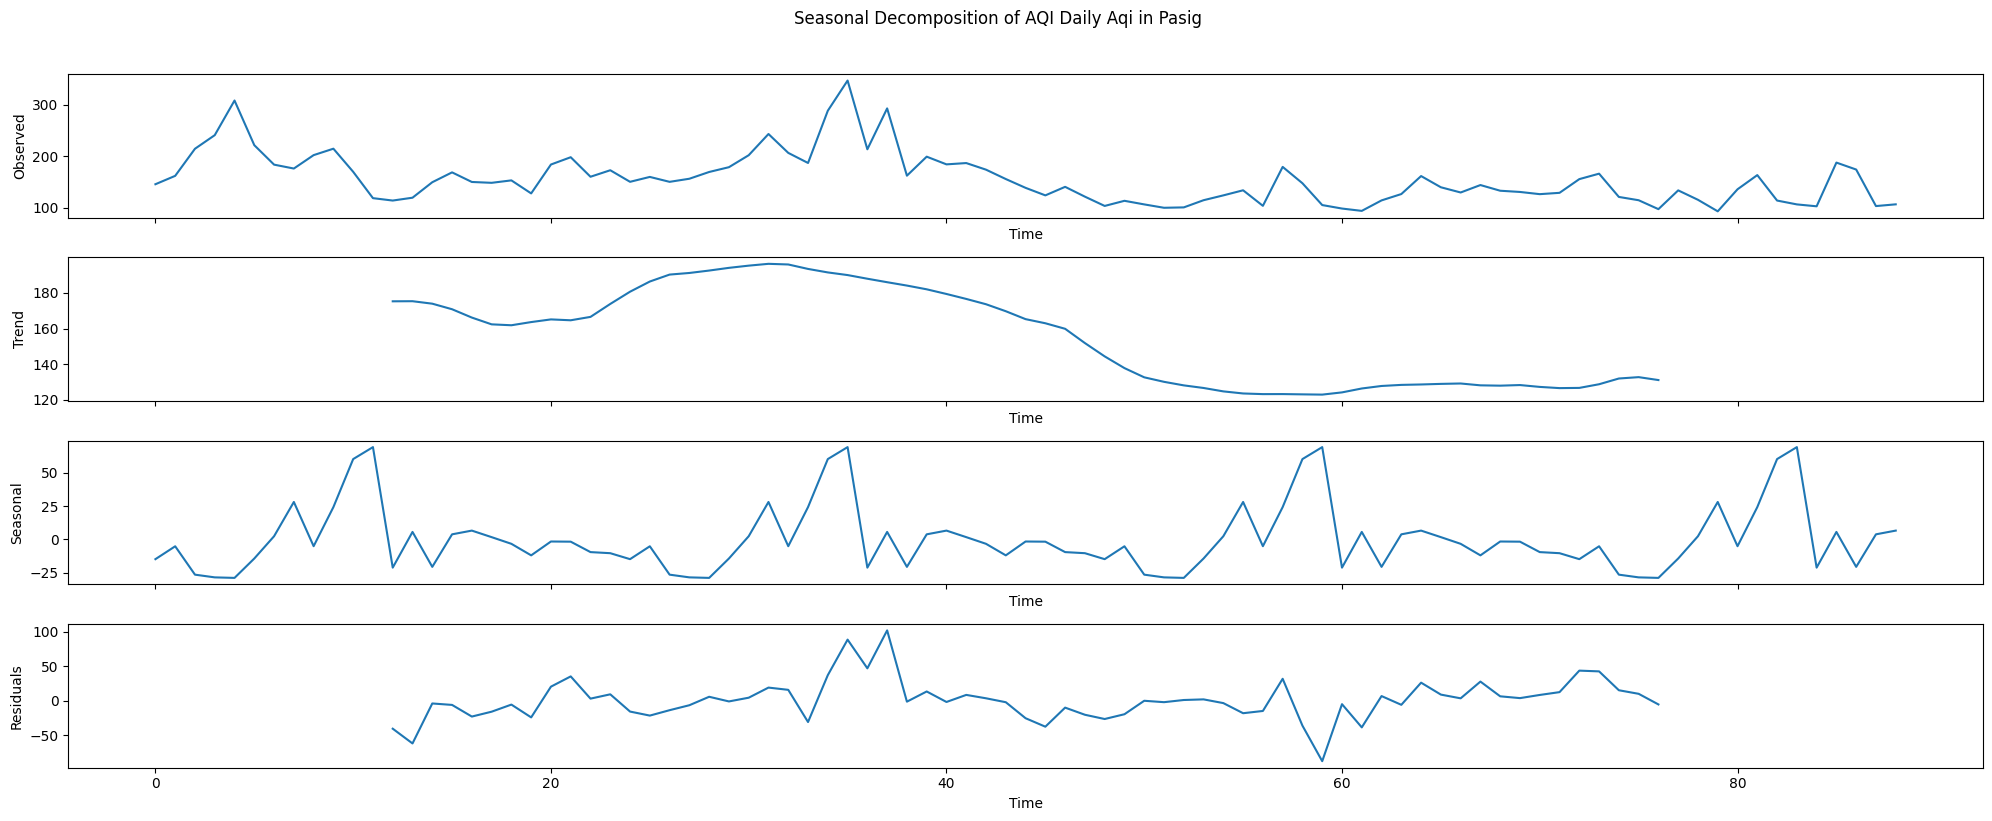

In [ ]:
result_Pasig = seasonal_decompose(Pasig_DF_Daily['final_aqi'], model='additive', period=24) #REMOVE [0:49] TO SEE THE FULL RESULT I JSUT DID THSI TO SEE THE SEASONALITY PROPERLY

print()
fig, axs = plt.subplots(4, 1, figsize=(20, 8), sharex=True)

axs[0].plot(result_Pasig.observed)
axs[0].set_ylabel('Observed')
axs[0].set_xlabel('Time')

axs[1].plot(result_Pasig.trend)
axs[1].set_ylabel('Trend')
axs[1].set_xlabel('Time')

axs[2].plot(result_Pasig.seasonal)
axs[2].set_ylabel('Seasonal')
axs[2].set_xlabel('Time')

axs[3].plot(result_Pasig.resid)
axs[3].set_ylabel('Residuals')
axs[3].set_xlabel('Time')

plt.suptitle('Seasonal Decomposition of AQI Daily Aqi in Pasig', y=1.02)
plt.tight_layout()
plt.show()

Interestingly, we now see that there is some declining trend in the daily aqi in Pasig as it decreases from the first half to the latter half of the months of Januray to April.

In [ ]:
import plotly.graph_objects as go

observed = go.Scatter(x=Pasig_DF_Daily['time'], y=result_Pasig.observed, mode='lines', name='Observed')
trend = go.Scatter(x=Pasig_DF_Daily['time'], y=result_Pasig.trend, mode='lines', name='Trend')
seasonal = go.Scatter(x=Pasig_DF_Daily['time'], y=result_Pasig.seasonal, mode='lines', name='Seasonal')
residual = go.Scatter(x=Pasig_DF_Daily['time'], y=result_Pasig.resid, mode='lines', name='Residual')


fig = go.Figure(data=[observed])
fig.update_layout(title='Observed',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[trend])
fig.update_layout(title='Trend',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[seasonal])
fig.update_layout(title='Seasonal',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[residual])
fig.update_layout(title='Residual',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()

<ipython-input-184-0b9d6ab347f2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



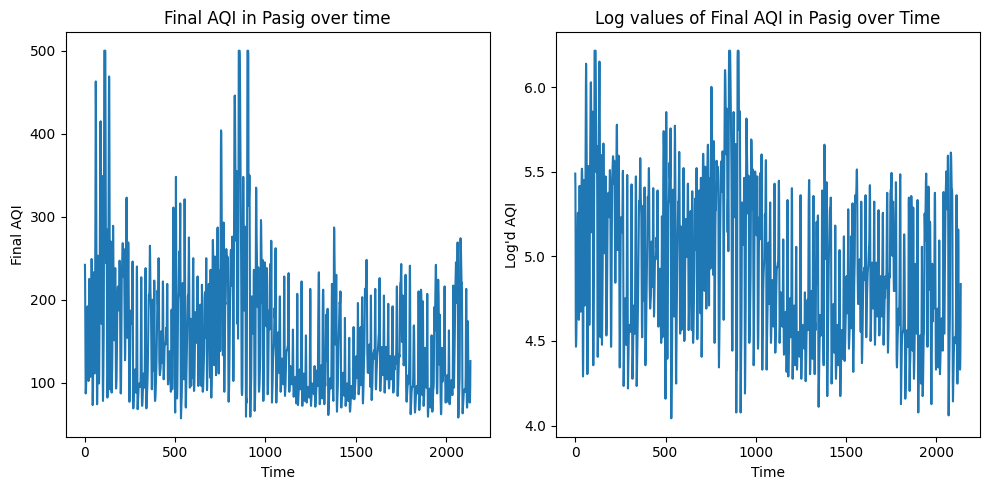

In [ ]:
Pasig_DF['Log of Final AQI'] = np.log(Pasig_DF['final_aqi'])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(Pasig_DF['final_aqi'])
axs[0].set_title('Final AQI in Pasig over time')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Final AQI')

axs[1].plot(Pasig_DF['Log of Final AQI'])
axs[1].set_title('Log values of Final AQI in Pasig over Time')
axs[1].set_ylabel("Log'd AQI")
axs[1].set_xlabel('Time')

plt.tight_layout()
plt.show()

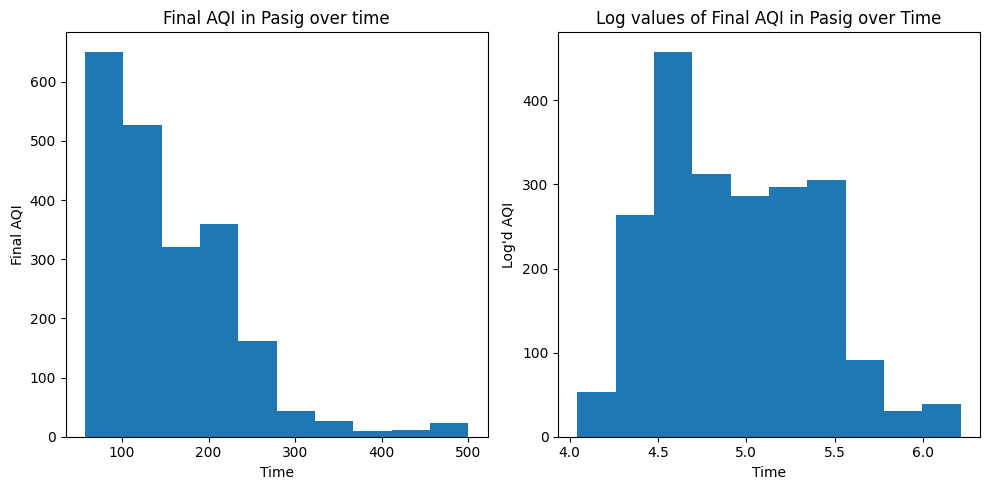

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(Pasig_DF['final_aqi'])
axs[0].set_title('Final AQI in Pasig over time')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Final AQI')

axs[1].hist(Pasig_DF['Log of Final AQI'])
axs[1].set_title('Log values of Final AQI in Pasig over Time')
axs[1].set_ylabel("Log'd AQI")
axs[1].set_xlabel('Time')

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(Pasig_DF_Daily['final_aqi'])

# Display the ADF test results
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'Critical Values: {adf_result[4]}')

# Interpretation
if adf_result[1] < 0.05:
    print("The time series is stationary (p-value < 0.05).")
else:
    print("The time series is non-stationary (p-value >= 0.05).")


ADF Statistic: -3.070971844928783
p-value: 0.028777325375857584
Critical Values: {'1%': np.float64(-3.5078527246648834), '5%': np.float64(-2.895382030636155), '10%': np.float64(-2.584823877658872)}
The time series is stationary (p-value < 0.05).


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(Pasig_DF_Daily['final_aqi'])

# Display the ADF test results
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'Critical Values: {adf_result[4]}')

# Interpretation
if adf_result[1] < 0.05:
    print("The time series is stationary (p-value < 0.05).")
else:
    print("The time series is non-stationary (p-value >= 0.05).")


ADF Statistic: -3.070971844928783
p-value: 0.028777325375857584
Critical Values: {'1%': np.float64(-3.5078527246648834), '5%': np.float64(-2.895382030636155), '10%': np.float64(-2.584823877658872)}
The time series is stationary (p-value < 0.05).


Interestingly enough, when we conduct the ADF test for stationarity on our hourly granularity data, the result is that the data is stationary. However, upon conducting the test on our daily level data, the result is non-stationary.

#Marikina

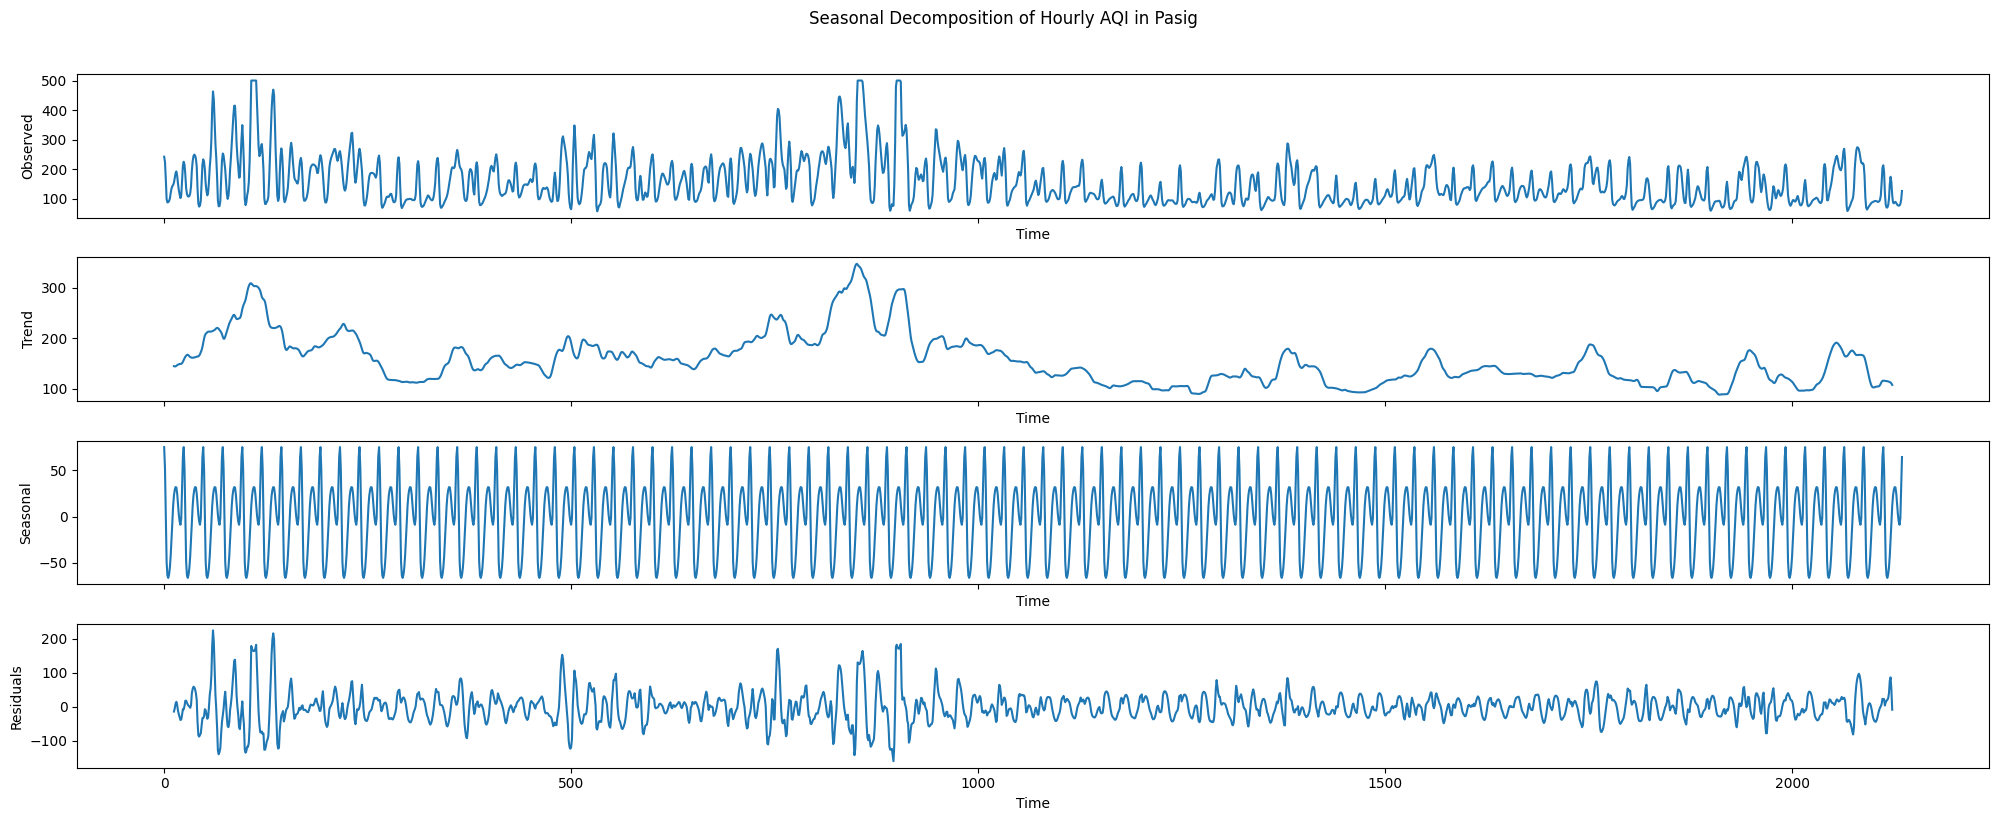

In [ ]:
result_Marikina = seasonal_decompose(Marikina_DF['final_aqi'], model='additive', period=24)

print()
fig, axs = plt.subplots(4, 1, figsize=(20, 8), sharex=True)

axs[0].plot(result_Marikina.observed)
axs[0].set_ylabel('Observed')
axs[0].set_xlabel('Time')

axs[1].plot(result_Marikina.trend)
axs[1].set_ylabel('Trend')
axs[1].set_xlabel('Time')

axs[2].plot(result_Marikina.seasonal)
axs[2].set_ylabel('Seasonal')
axs[2].set_xlabel('Time')

axs[3].plot(result_Marikina.resid)
axs[3].set_ylabel('Residuals')
axs[3].set_xlabel('Time')

plt.suptitle('Seasonal Decomposition of Hourly AQI in Pasig', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

observed = go.Scatter(x=Marikina_DF['time'], y=result_Marikina.observed, mode='lines', name='Observed')
trend = go.Scatter(x=Marikina_DF['time'], y=result_Marikina.trend, mode='lines', name='Trend')
seasonal = go.Scatter(x=Marikina_DF['time'], y=result_Marikina.seasonal, mode='lines', name='Seasonal')
residual = go.Scatter(x=Marikina_DF['time'], y=result_Marikina.resid, mode='lines', name='Residual')


fig = go.Figure(data=[observed])
fig.update_layout(title='Observed',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[trend])
fig.update_layout(title='Trend',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[seasonal])
fig.update_layout(title='Seasonal',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[residual])
fig.update_layout(title='Residual',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()

Same observation with Pasig, Two peaks, 12midngith and 1 PM

In [ ]:
Marikina_DF_Daily = Marikina_DF.groupby(pd.Grouper(key = 'time', freq = 'D'))['final_aqi'].mean().reset_index()

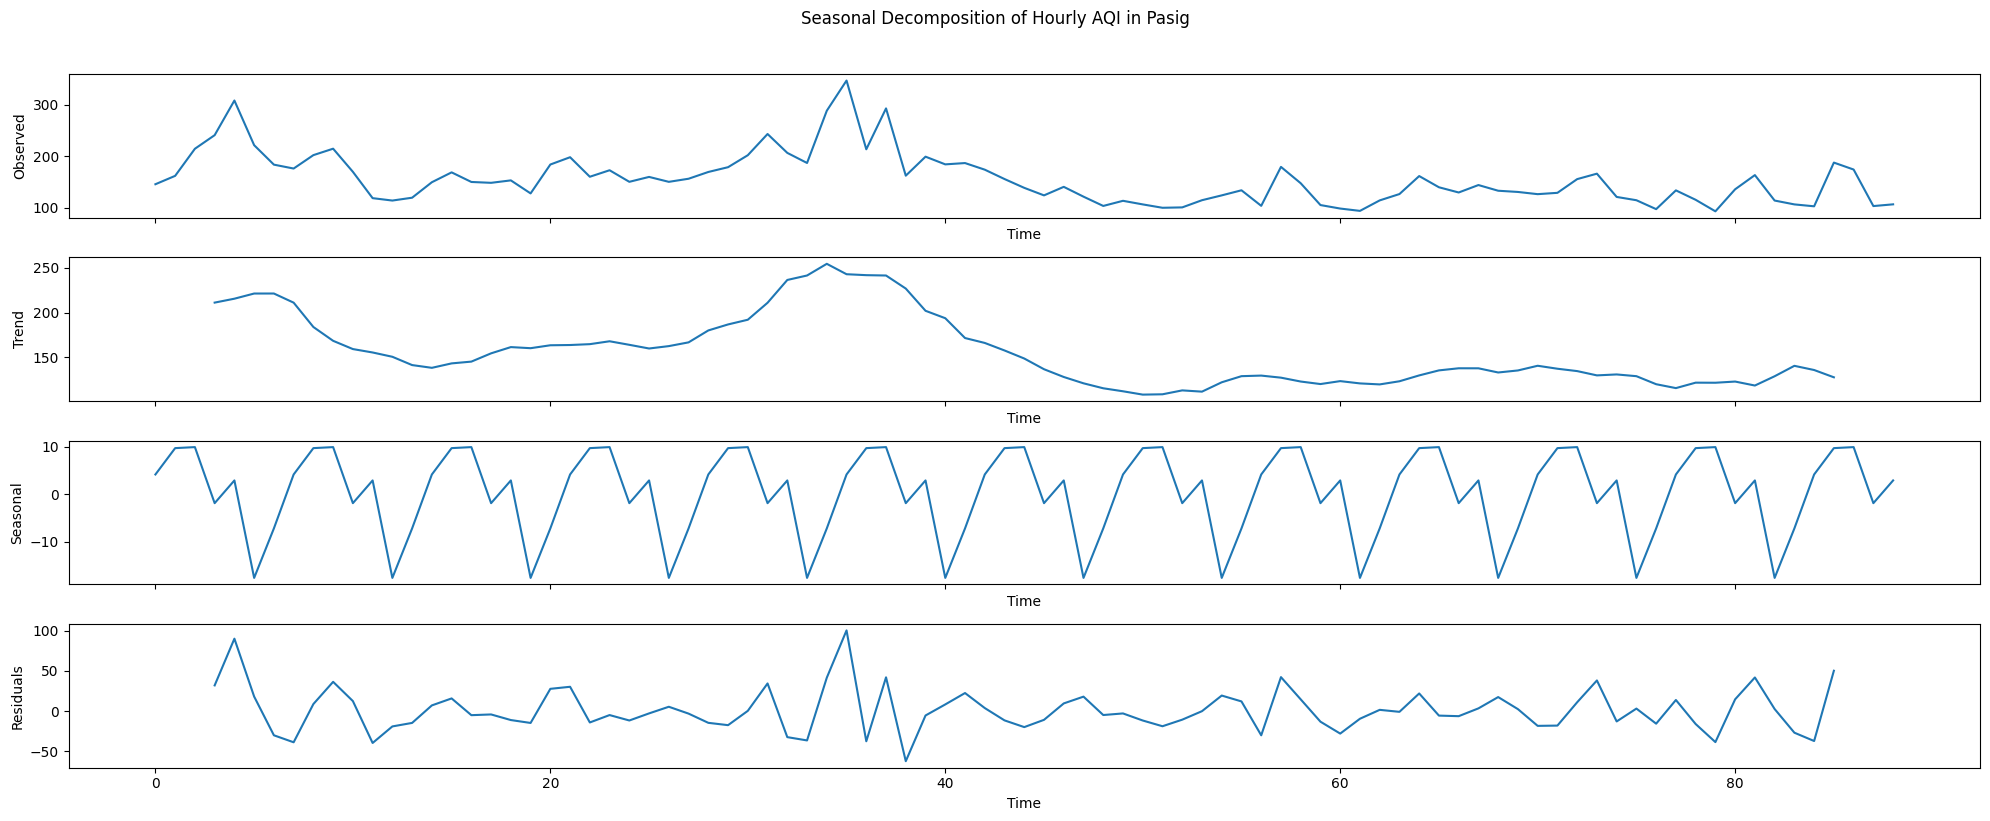

In [ ]:
result_Marikina = seasonal_decompose(Marikina_DF_Daily['final_aqi'], model='additive', period=7)
print()
fig, axs = plt.subplots(4, 1, figsize=(20, 8), sharex=True)

axs[0].plot(result_Marikina.observed)
axs[0].set_ylabel('Observed')
axs[0].set_xlabel('Time')

axs[1].plot(result_Marikina.trend)
axs[1].set_ylabel('Trend')
axs[1].set_xlabel('Time')

axs[2].plot(result_Marikina.seasonal)
axs[2].set_ylabel('Seasonal')
axs[2].set_xlabel('Time')

axs[3].plot(result_Marikina.resid)
axs[3].set_ylabel('Residuals')
axs[3].set_xlabel('Time')

plt.suptitle('Seasonal Decomposition of Hourly AQI in Pasig', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

observed = go.Scatter(x=Marikina_DF_Daily['time'], y=result_Marikina.observed, mode='lines', name='Observed')
trend = go.Scatter(x=Marikina_DF_Daily['time'], y=result_Marikina.trend, mode='lines', name='Trend')
seasonal = go.Scatter(x=Marikina_DF_Daily['time'], y=result_Marikina.seasonal, mode='lines', name='Seasonal')
residual = go.Scatter(x=Marikina_DF_Daily['time'], y=result_Marikina.resid, mode='lines', name='Residual')


fig = go.Figure(data=[observed])
fig.update_layout(title='Observed',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[trend])
fig.update_layout(title='Trend',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[seasonal])
fig.update_layout(title='Seasonal',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[residual])
fig.update_layout(title='Residual',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()

Same observation with Pasig

#Manila

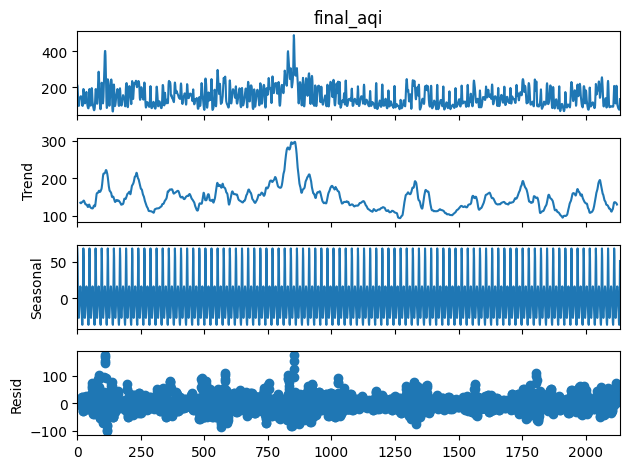

In [ ]:
result_Manila = seasonal_decompose(Manila_DF['final_aqi'], model='additive', period=24)
result_Manila.plot()

trend = result_Manila.trend
seasonal = result_Manila.seasonal
residual = result_Manila.resid

In [ ]:
import plotly.graph_objects as go

observed = go.Scatter(x=Manila_DF['time'], y=result_Manila.observed, mode='lines', name='Observed')
trend = go.Scatter(x=Manila_DF['time'], y=result_Manila.trend, mode='lines', name='Trend')
seasonal = go.Scatter(x=Manila_DF['time'], y=result_Manila.seasonal, mode='lines', name='Seasonal')
residual = go.Scatter(x=Manila_DF['time'], y=result_Manila.resid, mode='lines', name='Residual')


fig = go.Figure(data=[observed])
fig.update_layout(title='Observed',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[trend])
fig.update_layout(title='Trend',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[seasonal])
fig.update_layout(title='Seasonal',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[residual])
fig.update_layout(title='Residual',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()

In [ ]:
Manila_DF_Daily = Manila_DF.groupby(pd.Grouper(key = 'time', freq = 'D'))['final_aqi'].mean().reset_index()

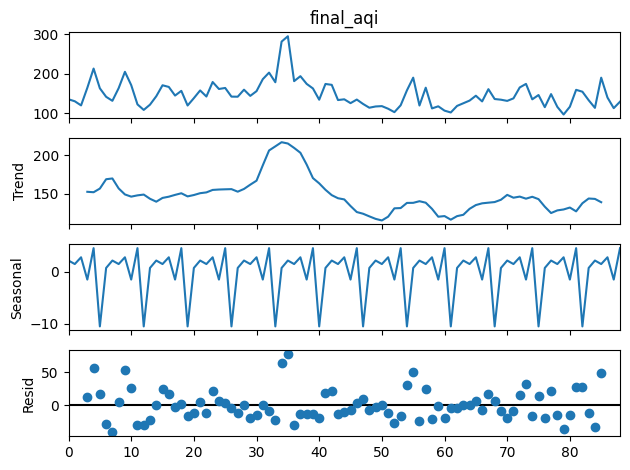

In [ ]:
result_Manila = seasonal_decompose(Manila_DF_Daily['final_aqi'], model='additive', period=7)
result_Manila.plot()

trend = result_Manila.trend
seasonal = result_Manila.seasonal
residual = result_Manila.resid

In [ ]:
import plotly.graph_objects as go

observed = go.Scatter(x=Manila_DF_Daily['time'], y=result_Manila.observed, mode='lines', name='Observed')
trend = go.Scatter(x=Manila_DF_Daily['time'], y=result_Manila.trend, mode='lines', name='Trend')
seasonal = go.Scatter(x=Manila_DF_Daily['time'], y=result_Manila.seasonal, mode='lines', name='Seasonal')
residual = go.Scatter(x=Manila_DF_Daily['time'], y=result_Manila.resid, mode='lines', name='Residual')


fig = go.Figure(data=[observed])
fig.update_layout(title='Observed',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[trend])
fig.update_layout(title='Trend',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[seasonal])
fig.update_layout(title='Seasonal',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[residual])
fig.update_layout(title='Residual',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()

<ipython-input-198-da0943c9d8b7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



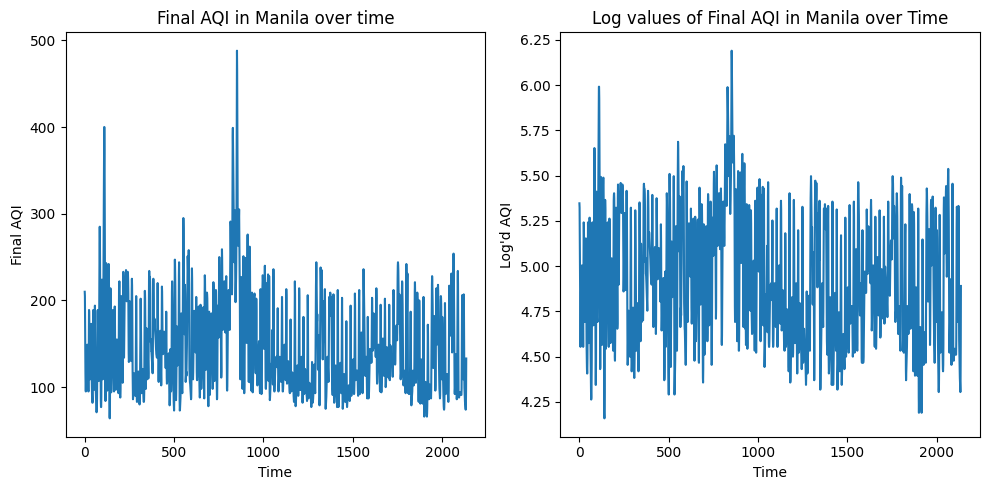

In [ ]:
Manila_DF['Log of Final AQI'] = np.log(Manila_DF['final_aqi'])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(Manila_DF['final_aqi'])
axs[0].set_title('Final AQI in Manila over time')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Final AQI')

axs[1].plot(Manila_DF['Log of Final AQI'])
axs[1].set_title('Log values of Final AQI in Manila over Time')
axs[1].set_ylabel("Log'd AQI")
axs[1].set_xlabel('Time')

plt.tight_layout()
plt.show()

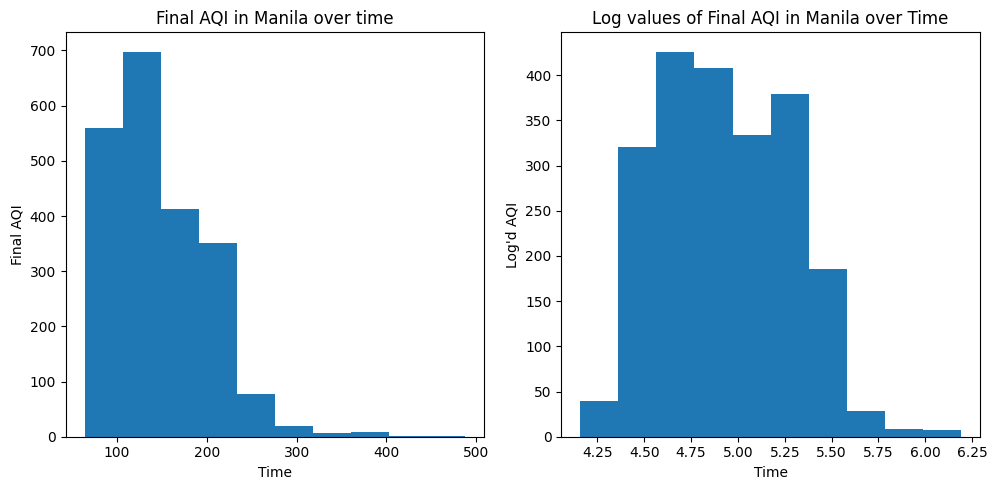

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(Manila_DF['final_aqi'])
axs[0].set_title('Final AQI in Manila over time')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Final AQI')

axs[1].hist(Manila_DF['Log of Final AQI'])
axs[1].set_title('Log values of Final AQI in Manila over Time')
axs[1].set_ylabel("Log'd AQI")
axs[1].set_xlabel('Time')

plt.tight_layout()
plt.show()

#San Juan


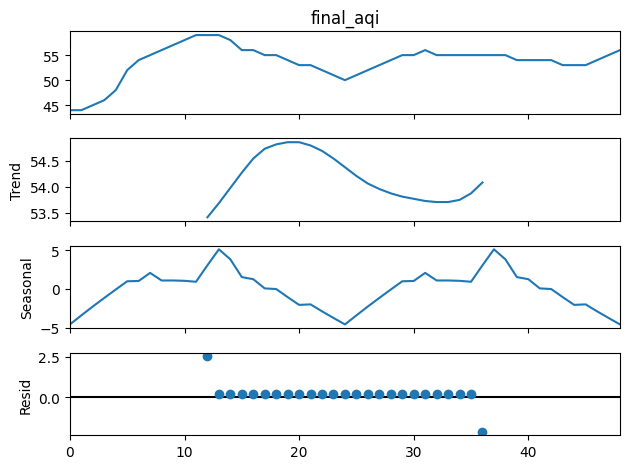

In [ ]:
result_San_Juan = seasonal_decompose(San_Juan_DF['final_aqi'][0:49], model='additive', period=24)
result_San_Juan.plot()

trend = result_San_Juan.trend
seasonal = result_San_Juan.seasonal
residual = result_San_Juan.resid

In [ ]:
import plotly.graph_objects as go

observed = go.Scatter(x=San_Juan_DF['time'], y=result_San_Juan.observed, mode='lines', name='Observed')
trend = go.Scatter(x=San_Juan_DF['time'], y=result_San_Juan.trend, mode='lines', name='Trend')
seasonal = go.Scatter(x=San_Juan_DF['time'], y=result_San_Juan.seasonal, mode='lines', name='Seasonal')
residual = go.Scatter(x=San_Juan_DF['time'], y=result_San_Juan.resid, mode='lines', name='Residual')


fig = go.Figure(data=[observed])
fig.update_layout(title='Observed',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[trend])
fig.update_layout(title='Trend',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[seasonal])
fig.update_layout(title='Seasonal',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[residual])
fig.update_layout(title='Residual',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()

In [ ]:
San_Juan_Daily = San_Juan_DF.groupby(pd.Grouper(key = 'time', freq = 'D'))['final_aqi'].mean().reset_index()

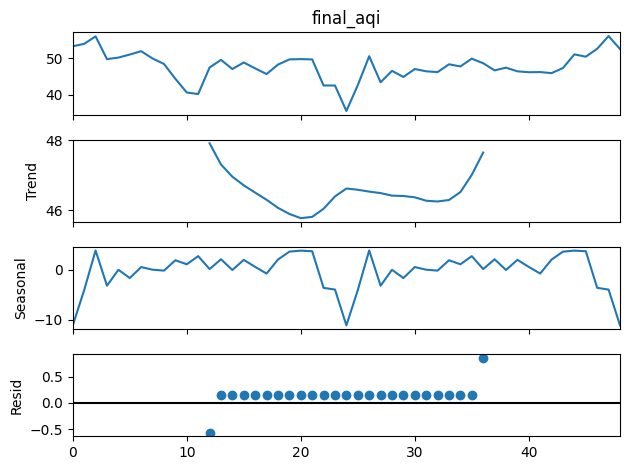

In [ ]:
result_San_Juan = seasonal_decompose(San_Juan_Daily['final_aqi'][0:49], model='additive', period=24)
result_San_Juan.plot()

trend = result_San_Juan.trend
seasonal = result_San_Juan.seasonal
residual = result_San_Juan.resid

<ipython-input-204-60c5661d126f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



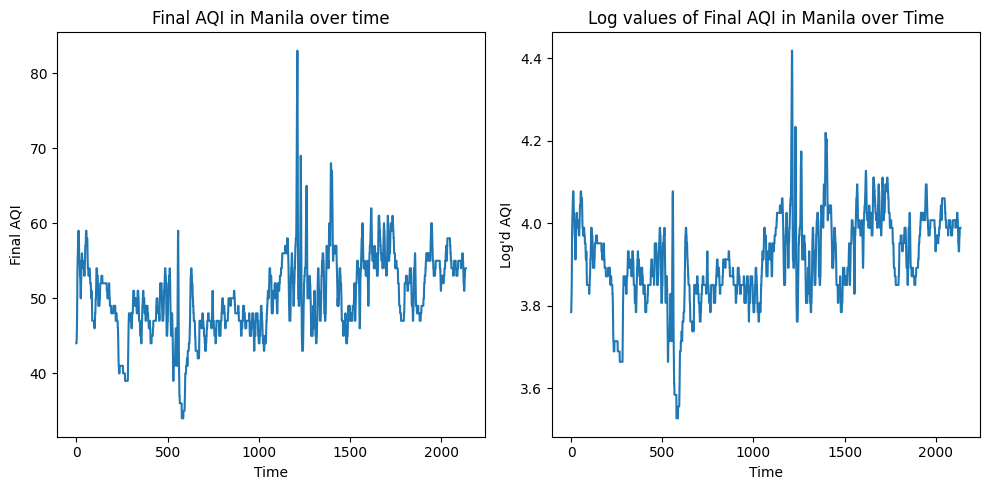

In [ ]:
San_Juan_DF['Log of Final AQI'] = np.log(San_Juan_DF['final_aqi'])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(San_Juan_DF['final_aqi'])
axs[0].set_title('Final AQI in Manila over time')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Final AQI')

axs[1].plot(San_Juan_DF['Log of Final AQI'])
axs[1].set_title('Log values of Final AQI in Manila over Time')
axs[1].set_ylabel("Log'd AQI")
axs[1].set_xlabel('Time')

plt.tight_layout()
plt.show()

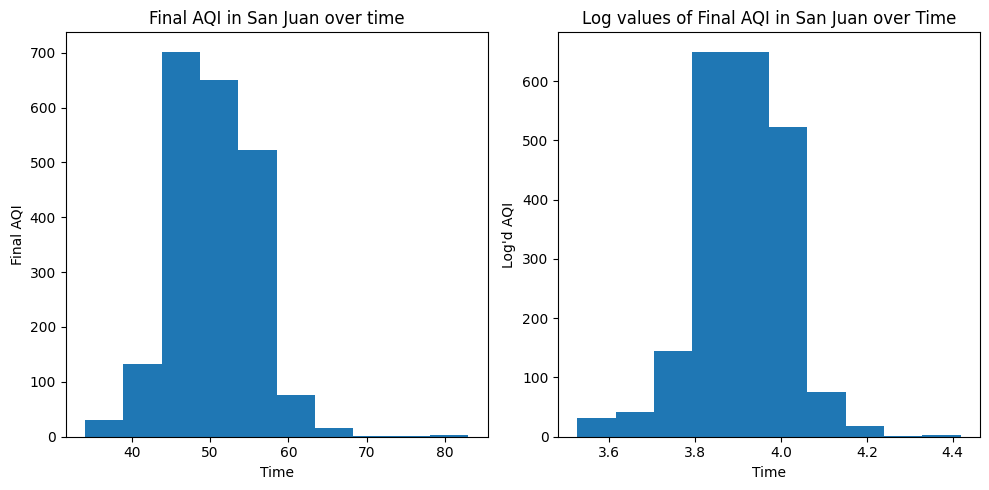

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(San_Juan_DF['final_aqi'])
axs[0].set_title('Final AQI in San Juan over time')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Final AQI')

axs[1].hist(San_Juan_DF['Log of Final AQI'])
axs[1].set_title('Log values of Final AQI in San Juan over Time')
axs[1].set_ylabel("Log'd AQI")
axs[1].set_xlabel('Time')

plt.tight_layout()
plt.show()

We see that subjecting the final aqis to a log transformation does not change anything. This is because the final aqis in San Juan are too low to be affected by a log transformation.

#Hourly and Seasonal Effects of All Cities

Now we want to try and plot the hourly and seasonal effects of all the cities and metro manila. This is to see if there is a consistency between any of the cities.

First we start with the hourly seasonality

In [ ]:
meteo_dataframe

time  pm10  pm2_5  carbon_monoxide  nitrogen_dioxide  \
0    2025-01-10 00:00:00  13.3   10.5            365.0               8.1   
1    2025-01-10 01:00:00  14.0   11.1            351.0               6.8   
2    2025-01-10 02:00:00  14.7   11.7            305.0               5.1   
3    2025-01-10 03:00:00  14.9   11.8            267.0               3.7   
4    2025-01-10 04:00:00  14.6   11.6            249.0               2.9   
...                  ...   ...    ...              ...               ...   
2131 2025-04-08 19:00:00  10.0    8.1            152.0               9.0   
2132 2025-04-08 20:00:00   9.4    7.5            153.0               9.3   
2133 2025-04-08 21:00:00   9.4    7.8            162.0               9.3   
2134 2025-04-08 22:00:00   9.4    7.9            189.0               8.6   
2135 2025-04-08 23:00:00   8.7    7.1            223.0               7.6   

      sulphur_dioxide      City  Day        Date  pm10_aqi  pm2_5_aqi  \
0                 8.7  Caloocan   10  2025-01-10        12         44   
1                 8.4  Caloocan   10  2025-01-10        13         46   
2                 8.0  Caloocan   10  2025-01-10        14         49   
3                 7.5  Caloocan   10  2025-01-10        14         49   
4                 6.7  Caloocan   10  2025-01-10        14         48   
...               ...       ...  ...         ...       ...        ...   
2131              2.9   Pateros    8  2025-04-08         9         34   
2132              3.1   Pateros    8  2025-04-08         9         31   
2133              3.4   Pateros    8  2025-04-08         9         32   
2134              4.1   Pateros    8  2025-04-08         9         33   
2135              5.0   Pateros    8  2025-04-08         8         30   

      carbon_monoxide_aqi  nitrogen_dioxide_aqi  sulphur_dioxide_aqi  \
0                     161                     4                    5   
1                     153                     4                    5   
2                     125                     3                    4   
3                     103                     2                    4   
4                      95                     1                    4   
...                   ...                   ...                  ...   
2131                   61                     5                    2   
2132                   61                     5                    2   
2133                   65                     5                    2   
2134                   74                     4                    2   
2135                   86                     4                    3   

      final_aqi final_aqi_contributor  seasonal  
0           161   carbon_monoxide_aqi  1.432024  
1           153   carbon_monoxide_aqi  1.343345  
2           125   carbon_monoxide_aqi  1.110826  
3           103   carbon_monoxide_aqi  0.930613  
4            95   carbon_monoxide_aqi  0.874382  
...         ...                   ...       ...  
2131         61   carbon_monoxide_aqi  0.801371  
2132         61   carbon_monoxide_aqi  0.790414  
2133         65   carbon_monoxide_aqi  0.838631  
2134         74   carbon_monoxide_aqi  1.037142  
2135         86   carbon_monoxide_aqi  1.305623  

[36312 rows x 17 columns]

In [ ]:
result = seasonal_decompose(meteo_dataframe['final_aqi'], model='multiplicative', period= 24)
meteo_dataframe['seasonal'] = result.seasonal


meteo_dataframe['seasonal']



0       1.432024
1       1.343345
2       1.110826
3       0.930613
4       0.874382
          ...   
2131    0.801371
2132    0.790414
2133    0.838631
2134    1.037142
2135    1.305623
Name: seasonal, Length: 36312, dtype: float64

In [ ]:
cities_df_list = []

for _ in metro_manila_cities:
    cities_df_list.append(meteo_dataframe[meteo_dataframe['City'] == _])

city_dataframe_dict = dict(zip(metro_manila_cities, cities_df_list))

In [ ]:
for city, df in city_dataframe_dict.items():
    result = seasonal_decompose(df['final_aqi'], model='multiplicative', period=24)
    df['hourly_seasonal'] = result.seasonal
    city_dataframe_dict[city] = df

<ipython-input-209-24273085998b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-209-24273085998b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-209-24273085998b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-209-242

In [ ]:
all_cities_df = pd.concat(city_dataframe_dict.values(), ignore_index=True)
all_cities_df = all_cities_df.sort_values(by=['time', 'City'])


In [ ]:
all_cities_df['City'].value_counts()

City
Caloocan       2136
Las Piñas      2136
Makati         2136
Malabon        2136
Mandaluyong    2136
Manila         2136
Marikina       2136
Muntinlupa     2136
Navotas        2136
Parañaque      2136
Pasay          2136
Pasig          2136
Pateros        2136
Quezon City    2136
San Juan       2136
Taguig         2136
Valenzuela     2136
Name: count, dtype: int64

Below is the hourly seasonality of all the cities in metro manila. The plot is rather dense due to the fact that there are many cities and datapoints. To get a better look at the hourly seasonality, we will limit the range of time.

In [ ]:
fig = px.line(all_cities_df, x="time", y="hourly_seasonal", color="City", title="Hourly Seasonal Effects per City")
fig.show()

Clearly, it is much easier to comprehend the plot below than the plot above. We can see that a vast majority of the cities have dual peaks, at midnight and from the various hours of 9am - 2pm in the afternoon depending on the city. The exceptions to this are San Juan city and Navotas, with the former only having one peak at 6 am, and the latter having one peak at around 8 am.

In [ ]:
fig = px.line(all_cities_df, x="time", y="hourly_seasonal", color="City", title="Hourly Seasonal Effects per City", range_x=['2025-01-20', '2025-01-21'])
fig.show()

Next we look at the daily seasonality of the cities by aggregating the mean of the final aqis first and then using the seasonal_decompose function after.

In [ ]:
for city, df in city_dataframe_dict.items():
    df = df.groupby([pd.Grouper(key='time', freq='D'), 'City'])['final_aqi'].mean().reset_index()
    result = seasonal_decompose(df['final_aqi'], model='multiplicative', period=7)
    df['daily_seasonal'] = result.seasonal
    city_dataframe_dict[city] = df

In [ ]:
all_cities_df_daily = pd.concat(city_dataframe_dict.values(), ignore_index=True)

In [ ]:
all_cities_df_daily

time     City   final_aqi  daily_seasonal
0    2025-01-10   Manila  135.416667        1.006595
1    2025-01-11   Manila  130.375000        1.019724
2    2025-01-12   Manila  119.875000        1.017020
3    2025-01-13   Manila  164.541667        0.989321
4    2025-01-14   Manila  213.416667        1.034335
...         ...      ...         ...             ...
1508 2025-04-04  Pateros   84.583333        0.976296
1509 2025-04-05  Pateros  109.458333        1.046914
1510 2025-04-06  Pateros  107.583333        1.046908
1511 2025-04-07  Pateros   76.250000        0.989546
1512 2025-04-08  Pateros   76.375000        0.972758

[1513 rows x 4 columns]

We will limit the day ranges to be from January 20, 2025 to January 27, 2025.

In [ ]:
fig = px.line(all_cities_df_daily, x="time", y="daily_seasonal", color="City", title="Seasonal Effects per City", range_x=['2025-01-20', '2025-01-27'])
fig.show()

Above we see that Friday seens to be the day where most cities have increased AQI values. On the other hand, we see that tuesdays seem to be the day where final aqis are decreased and air quality is better.

#Final insights
Studying the quality of the air we breathe is important as we may suffer negative health effects if we were to be exposed to poor quality air regularly. Among the air pollutants, Carbon Monoxide seems to be the pollutant that is the most dominant, making it the biggest factor in calculating the AQI value in all cities of Metro Manila. This pollutant is produced largely by the burning of fuels. Thus, we expect and see that cities with many factories or that many flock to have the worst air pollution. Examples of these are Pasig and Marikina, cities that are home to many chemical and steel processing factories. In most cities in Metro Manila, air quality worsens at midnight and in the early afternoon. The days where air quality is commonly at its worst on the other hand are on Fridays, while the days where air quality is at its worst are on Tuesdays.

Unfortunately for us, Carbon Monoxide is colorless, odorless, and it cannot be counteracted and mitigated by chemicals. Additionally, commonplace medical masks do not filter out this gas. These factors make it difficult to act against. So, for those who are conscious about their lung health.

 For those who are sensitive to Carbon Monoxide, we recommend them to travel early in the morning at around 6am, and/or at around 7pm to 8pm to minimize exposure to Carbon Monoxide. Additionally, if on the slim chance this is possible, we recommend them to travel on Tuesdays and avoid travelling on Fridays.

 On a larger scale, we recommend the governemnt to introduce policies that would reduce the processes or objects that produce Carbon Monoxide. Again, this is difficult, as Carbon Monoxide is produced by crucial day to day activities; cars are instrumental in the transport of goods and people, and factories produce important goods that society depends on. Thus, a policy that would incentivize the purchasing of Electric Vehicles and greener and cleaner or more effective fuel consumption in factories is essential.